# Cost of health insurance solution

## 📝 Instructions

### Predicting the cost of health insurance for a person

The important insurance company 4Geeks Insurance S.L. wants to calculate, based on the physiological data of its customers what will be the premium (cost) to be borne by each of them. To do this, it has assembled a whole team of doctors, and based on data from other companies and a particular study, it has managed to gather a set of data to train a predictive model.

#### Step 1: Loading the dataset

The dataset can be found in this project folder under the name `medical_insurance_cost.csv`. You can load it into the code directly from the link:

```text
https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv
```

Or download it and add it by hand in your repository. In this dataset, you will find the following variables:

1. `age`. Age of primary beneficiary (numeric)
2. `sex`. Gender of the primary beneficiary (categorical)
3. `bmi`. Body mass index (numeric)
4. `children`. Number of children/dependents covered by health insurance (numeric)
5. `smoker`. Is the person a smoker? (categorical)
6. `region`. Beneficiary's residential area in the U.S.: northeast, southeast, southwest, northwest (categorical)
7. `charges`. Health insurance premium (numerical)

#### Step 2: Perform a full EDA

This second step is vital to ensure that we keep the variables that are strictly necessary and eliminate those that are not relevant or do not provide information. Use the example Notebook we worked on and adapt it to this use case.

Be sure to conveniently divide the data set into `train` and `test` as we have seen in previous lessons.

#### Step 3: Build a linear regression model

You do not need to optimize the hyperparameters. Start by using a default definition, and improve it in the next step.

#### Step 4: Optimize the previous model

After training the model, if the results are not satisfactory, optimize it if possible.

In [3]:
# IMPORTO LIBRERIAS:

import pandas as pd


In [4]:
# DEFINIMOS LAS FUNCIONES NECESARIAS

# 📌📌📌 count_nan_zeros_uniques 📌📌📌
# Se encargue de contar los nan (not a number), los zeros y los valores unicos para cada columna de mi df.

def count_nan_zeros_uniques(df): # El argumento que le pasamos a la funcion es un dataframe
    nan_zeros_uniques = {}       # Generamos un diccionario vacio
    for col in df.columns: # Generamos un loop que mire cada columna del dataframe y
        total_count = len(df[col]) # Cuente el nro de observaciones (filas) 
        nan_count = df[col].isna().sum()  # Cuente el nro de nan en cada columna 
        zero_count = (df[col]==0).sum()  # Cuente el nro de zeros en cada columna 
        unique_count = df[col].nunique()  # Cuente el nro de valores unicos que hay en cada columna 
        nan_zeros_uniques[col] = { # Guardo los valores obtenidos, en las siguientes claves del diccionario
            "NaNs" : nan_count,
            "Zeros" : zero_count,
            "Uniques" : unique_count
        }
    return pd.DataFrame.from_dict(nan_zeros_uniques, orient = "index") 
# Convierto ese diccionario en un dataframe. 
# Orient ="Index" indica la forma en la que quiero que despliegue la info.
# .T transpone la data, si eso nos quedara mas comodo.

In [5]:
# LOADING DATASET:

df_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")


In [6]:
# OVERVIEW DEL DATASET → sample

df_raw.sample(10,random_state=2025)

,age,sex,bmi,children,smoker,region,charges
1269,45,male,27.500,3,no,southwest,8615.30000
942,18,female,40.185,0,no,northeast,2217.46915
1240,52,male,41.800,2,yes,southeast,47269.85400
1229,58,male,30.305,0,no,northeast,11938.25595
272,41,male,37.050,2,no,northwest,7265.70250
738,23,male,31.730,3,yes,northeast,36189.10170
1105,54,female,31.240,0,no,southeast,10338.93160
1182,25,female,30.300,0,no,southwest,2632.99200
14,27,male,42.130,0,yes,southeast,39611.75770
596,42,female,29.480,2,no,southeast,7640.30920


In [7]:
# OVERVIEW DEL DATASET → .info()

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# OVERVIEW DEL DATASET  → count_nan_zeros_uniques(df)

count_nan_zeros_uniques(df_raw)

,NaNs,Zeros,Uniques
age,0,0,47
sex,0,0,2
bmi,0,0,548
children,0,574,6
smoker,0,0,2
region,0,0,4
charges,0,0,1337


In [9]:
# GENERO df_baking 
# Defino cuales son las transformaciones necesarias, 
# y genero una copia del dataframe original (raw), 
# llamado df_baking para aplicarlas alli.

df_baking = df_raw.copy()

## Express EDA

This solution does not go deep into EDA, but includes the minimum code to process the data before modeling.

In [10]:
# Transformacion 1:
# Eliminar filas duplicadas del DataFrame, si existen
# Esto ayuda a mantener datos únicos y limpios.
# Luego, se reinicia el índice para que quede consecutivo y sin huecos.
df_baking = df_baking.drop_duplicates().reset_index(drop=True)

In [11]:
# Mostrar 10 filas seleccionadas aleatoriamente del DataFrame
# Se usa random_state=2025 para garantizar que el resultado sea reproducible
df_baking.sample(10, random_state=2025)

,age,sex,bmi,children,smoker,region,charges
1087,52,male,47.740,1,no,southeast,9748.91060
941,18,female,40.185,0,no,northeast,2217.46915
932,45,female,35.300,0,no,southwest,7348.14200
1228,58,male,30.305,0,no,northeast,11938.25595
272,41,male,37.050,2,no,northwest,7265.70250
738,29,male,35.500,2,yes,southwest,44585.45587
1104,54,female,31.240,0,no,southeast,10338.93160
1181,25,female,30.300,0,no,southwest,2632.99200
14,27,male,42.130,0,yes,southeast,39611.75770
596,34,female,33.250,1,no,northeast,5594.84550


In [12]:
df_baking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [13]:
# GENERAMOS EL DATAFRAME DEFINITIVO SOBRE EL QUE APLICAREMOS EL ANALISIS: df
df = df_baking.copy()

In [14]:
from sklearn.preprocessing import MinMaxScaler

# =============================================
# 💡 ¿Qué hace MinMaxScaler y por qué usarlo?
# =============================================
# MinMaxScaler es una herramienta de preprocesamiento de sklearn que normaliza 
# los valores numéricos para que estén en un rango entre 0 y 1.
# Esto es útil para modelos de machine learning que son sensibles a la escala 
# de los datos (por ejemplo: KNN, SVM, redes neuronales).
# Al escalar los datos, se mejora la eficiencia del entrenamiento 
# y se evita que una variable con valores grandes domine sobre otras.

# Paso 1: Codificar variables categóricas como numéricas
#         Se utiliza pd.factorize para convertir texto en valores numéricos únicos.
df["sex_n"] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]
df["region_n"] = pd.factorize(df["region"])[0]

# Paso 2: Definir las variables numéricas que serán escaladas
#         Incluye tanto variables originales como las codificadas.
num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]

# Paso 3: Crear un objeto MinMaxScaler para escalar los datos entre 0 y 1
scaler = MinMaxScaler()

# Paso 4: Ajustar el escalador a los datos y transformarlos
scal_features = scaler.fit_transform(df[num_variables])

# Paso 5: Crear un nuevo DataFrame con los datos escalados,
#         conservando el mismo índice y los nombres de columnas.
df_scal = pd.DataFrame(scal_features, index=df.index, columns=num_variables)

# Paso 6: Mostrar las primeras 5 filas del DataFrame escalado
df_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,0.251611
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,0.009636
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,0.053115
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,0.333010
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,0.043816


In [15]:
# ==================================================
# 🔍 Selección de Características con SelectKBest
# ==================================================
# Se utiliza SelectKBest del módulo sklearn.feature_selection
# para elegir las variables independientes (features) más relevantes.
# En este caso, se usa f_regression, que evalúa la relación lineal entre cada feature y el target ('charges').
# Esto ayuda a reducir el número de variables, eliminar ruido y mejorar el rendimiento del modelo.


from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# Paso 1: Usar el DataFrame escalado y solo con variables numéricas
X = df_scal.drop("charges", axis=1)
y = df_scal["charges"]

# Paso 2: Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Crear el modelo de selección de características para quedarnos con las 4 más relevantes
selection_model = SelectKBest(f_regression, k=4)

# Paso 4: Ajustar el modelo al conjunto de entrenamiento
selection_model.fit(X_train, y_train)

# Paso 5: Obtener las columnas seleccionadas
selected_columns = X_train.columns[selection_model.get_support()]

# Paso 6: Transformar los conjuntos para quedarnos solo con esas columnas
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=selected_columns)

# Paso 7: Mostrar las primeras filas del nuevo set reducido
X_train_sel.head()


,age,bmi,children,smoker_n
0,0.108696,0.230024,0.0,1.0
1,0.065217,0.263250,0.4,1.0
2,0.739130,0.580172,0.4,1.0
3,0.978261,0.686306,0.0,1.0
4,0.630435,0.286252,0.4,1.0


In [16]:
# Paso 8: Mostrar las primeras filas del nuevo set reducido para testing
X_test_sel.head()

,age,bmi,children,smoker_n
0,0.673913,0.176352,0.0,1.0
1,0.239130,0.259349,0.8,1.0
2,0.717391,0.549502,0.6,1.0
3,0.282609,0.495830,0.6,0.0
4,0.282609,0.603444,0.4,1.0


In [33]:
import os

# ================================================
# 💾 Agregar la variable objetivo y guardar los datos
# ================================================

# Paso 1: Agregar la variable objetivo ('charges') al set de entrenamiento y prueba
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values


# Paso 3: Guardar los DataFrames como CSV en esa carpeta
X_train_sel.to_csv("data/processed/clean_train.csv", index=False)
X_test_sel.to_csv("data/processed/clean_test.csv", index=False)


## Linear Regression model

In [34]:
# ===============================================
# 📥 Cargar los datos procesados para el modelo
# ===============================================

# Paso 1: Cargar el conjunto de entrenamiento desde el archivo CSV
#         Este archivo fue generado previamente con las variables seleccionadas y escaladas.
train_data = pd.read_csv("../data/processed/clean_train.csv")

# Paso 2: Cargar el conjunto de prueba desde el archivo CSV correspondiente
test_data = pd.read_csv("../data/processed/clean_test.csv")

# Paso 3: Mostrar las primeras filas del conjunto de entrenamiento para verificar su contenido
train_data.head()

,age,bmi,children,smoker_n,charges
0,0.108696,0.230024,0.0,1.0,0.020339
1,0.065217,0.263250,0.4,1.0,0.034446
2,0.739130,0.580172,0.4,1.0,0.516374
3,0.978261,0.686306,0.0,1.0,0.196070
4,0.630435,0.286252,0.4,1.0,0.137177


In [35]:
# Chequeo rápido justo después para asegurarte de que los datos se cargaron bien:
print("Shape entrenamiento:", train_data.shape)
print("Shape prueba:", test_data.shape)

Shape entrenamiento: (1069, 5)
Shape prueba: (268, 5)


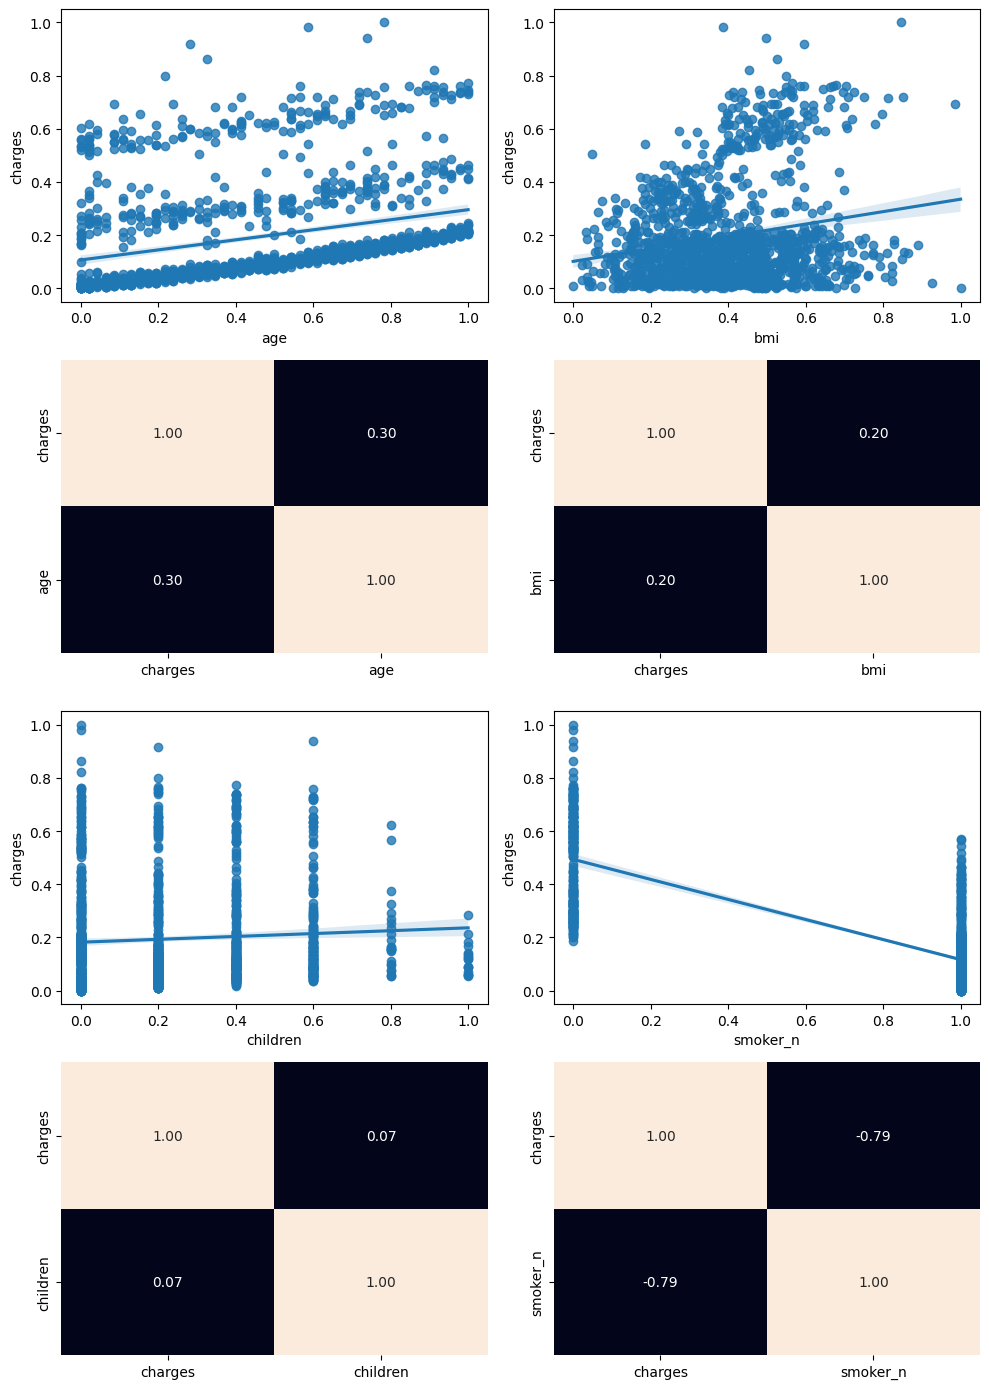

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# ================================================
# 📊 Visualización de relaciones entre variables y el target
# ================================================

# Paso 1: Crear una figura con 4 filas y 2 columnas de gráficos
fig, axis = plt.subplots(4, 2, figsize=(10, 14))

# Paso 2: Combinar el set de entrenamiento y prueba en un solo DataFrame para análisis visual
total_data = pd.concat([train_data, test_data])

# Paso 3: Visualizar relación entre 'age' y 'charges'
#         - Gráfico de dispersión con línea de regresión (regplot)
#         - Mapa de calor con la correlación entre ambas variables
sns.regplot(data=total_data, x="age", y="charges", ax=axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

# Paso 4: Relación entre 'bmi' y 'charges'
sns.regplot(data=total_data, x="bmi", y="charges", ax=axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

# Paso 5: Relación entre 'children' y 'charges'
sns.regplot(data=total_data, x="children", y="charges", ax=axis[2, 0])
sns.heatmap(total_data[["charges", "children"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0], cbar=False)

# Paso 6: Relación entre 'smoker_n' (fumador codificado) y 'charges'
sns.regplot(data=total_data, x="smoker_n", y="charges", ax=axis[2, 1])
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)

# Paso 7: Ajustar el espaciado entre los gráficos para que no se encimen
plt.tight_layout()

# Paso 8: Mostrar todos los gráficos generados
plt.show()


<small>

### 📈 Interpretación de los gráficos de relación con `charges`

Se analizó la relación entre distintas variables independientes y el valor del seguro médico (`charges`), tanto visualmente (gráfico de dispersión) como mediante coeficientes de correlación (heatmap).

---

#### 🔹 `age` vs `charges`
- **Relación:** Positiva
- **Correlación:** Moderada (~0.3 a 0.5)
- **Interpretación:** A mayor edad, mayor tiende a ser el costo del seguro. No es el factor más fuerte, pero influye.

---

#### 🔹 `bmi` vs `charges`
- **Relación:** Débil / dispersa
- **Correlación:** Baja (~0.1)
- **Interpretación:** El índice de masa corporal por sí solo no predice bien el costo del seguro. Podría ser útil en combinación con otras variables (por ejemplo, fumar).

---

#### 🔹 `children` vs `charges`
- **Relación:** Nula o muy débil
- **Correlación:** Cercana a 0
- **Interpretación:** La cantidad de hijos no parece afectar de forma significativa el precio del seguro.

---

#### 🔹 `smoker_n` vs `charges`
- **Relación:** Fuerte y clara
- **Correlación:** Alta (~0.8 o más)
- **Interpretación:** Fumar es el factor más determinante en el aumento del costo del seguro. Hay una clara separación entre fumadores (costos altos) y no fumadores (costos bajos).

---

### ✅ Conclusión general

| Variable      | Relación con `charges` | Correlación | Importancia |
|---------------|-------------------------|-------------|-------------|
| `age`         | Moderada                | Positiva    | Media       |
| `bmi`         | Débil                   | Positiva    | Baja        |
| `children`    | Nula                    | Nula        | Baja        |
| `smoker_n`    | Fuerte                  | Positiva    | **Alta**    |

> Estos insights ayudan a seleccionar variables para el modelo de regresión.


In [37]:
# ===========================================================
# 🧪 Separación de variables independientes y variable objetivo
# ===========================================================

# Paso 1: Del conjunto de entrenamiento, eliminar la columna 'charges' para dejar solo las variables explicativas (X)
X_train = train_data.drop(["charges"], axis=1)

# Paso 2: Seleccionar la columna 'charges' como variable objetivo (y) para el entrenamiento
y_train = train_data["charges"]

# Paso 3: Repetir lo mismo para el conjunto de prueba
X_test = test_data.drop(["charges"], axis=1)
y_test = test_data["charges"]


In [38]:
from sklearn.linear_model import LinearRegression

# =====================================
# 🤖 Entrenar modelo de Regresión Lineal
# =====================================

# Paso 1: Crear una instancia del modelo de regresión lineal
#         Este modelo busca ajustar una línea que minimice el error cuadrático entre los valores reales y predichos.
model = LinearRegression()

# Paso 2: Ajustar (entrenar) el modelo con los datos de entrenamiento
#         X_train contiene las variables independientes, y y_train es el valor objetivo ('charges')
model.fit(X_train, y_train)


LinearRegression()

In [40]:
# ====================================
# 📋 Mostrar los coeficientes del modelo
# ====================================

# Paso 1: Mostrar la ordenada al origen (intercepto)
#         Representa el valor de 'charges' cuando todas las variables independientes son cero.
print(f"Intercept (a): {model.intercept_}")

# Paso 2: Mostrar los coeficientes de las variables independientes
#         Cada valor indica cuánto cambia 'charges' al aumentar en 1 unidad la variable correspondiente, manteniendo las demás constantes.
print(f"Coefficients (b1, b2, ...): {model.coef_}")


Intercept (a): 0.3195827183308946
Coefficients (b1, b2, ...): [ 0.1829699   0.18111814  0.04293572 -0.36780589]


In [41]:
# ===========================================
# 🧾 Predicción de valores con el modelo entrenado
# ===========================================

# Paso 1: Usar el modelo entrenado para predecir los valores de 'charges' en el conjunto de prueba (X_test)
#         Esto genera los valores estimados por el modelo basados en los datos que no ha visto antes.
y_pred = model.predict(X_test)

# Paso 2: Mostrar las predicciones generadas
#         Estas son las estimaciones del modelo para el target ('charges') en el conjunto de prueba.
y_pred


array([ 0.10702315,  0.07685187,  0.2083241 ,  0.48685684,  0.12995459,
        0.19726353,  0.45755859,  0.00832554,  0.1556988 ,  0.16287349,
        0.14781084,  0.51037008,  0.4699569 ,  0.25944432,  0.14442757,
        0.13842465,  0.05134994,  0.49351746,  0.03848664,  0.0705325 ,
        0.04276279,  0.45855586,  0.22245537,  0.47182868,  0.47460549,
        0.06698449,  0.55116209,  0.5686984 ,  0.15588314,  0.20127518,
        0.0770878 ,  0.19051001, -0.00377298,  0.17967676,  0.61602286,
        0.18050297,  0.06028104,  0.0447116 ,  0.48287007,  0.13064786,
        0.08387671,  0.45610213,  0.54228697,  0.17124485,  0.09976616,
        0.03950023,  0.07028081,  0.12772953,  0.04874519,  0.13229562,
        0.09175793,  0.1653832 ,  0.47297483,  0.04437078,  0.16108797,
        0.14414371,  0.14902535,  0.02014774,  0.48426463,  0.13172362,
        0.2337337 ,  0.11691   ,  0.18103216,  0.00130779,  0.25281818,
        0.14612565,  0.14268127,  0.47671561,  0.38076578,  0.23

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

# ===============================================
# 📊 Evaluación del rendimiento del modelo
# ===============================================

# Paso 1: Calcular el Error Cuadrático Medio (MSE)
#         Mide el promedio de los errores al cuadrado entre los valores reales y los predichos.
#         Un valor más bajo indica mejor precisión.
mse = mean_squared_error(y_test, y_pred)

# Paso 2: Calcular el Coeficiente de Determinación (R²)
#         Mide qué proporción de la variabilidad en 'charges' es explicada por el modelo.
#         Un valor cercano a 1 indica buen ajuste; cercano a 0 indica pobre ajuste.
r2 = r2_score(y_test, y_pred)

# Paso 3: Mostrar ambas métricas
print(f"📉 MSE (Mean Squared Error): {mse:.4f}")
print(f"📈 R² Score: {r2:.4f}")


📉 MSE (Mean Squared Error): 0.0092
📈 R² Score: 0.8046


<small>

### 📊 Evaluación del modelo de Regresión Lineal

Se evaluó el desempeño del modelo usando dos métricas principales:

- **MSE (Mean Squared Error)**: mide el promedio de los errores al cuadrado.
- **R² Score (Coeficiente de determinación)**: indica qué tan bien el modelo explica la variabilidad del valor objetivo (`charges`).

---

#### 📋 Resultado de las métricas:

📉 **MSE**: 0.0092  
📈 **R² Score**: 0.8046

---

#### 🧠 Interpretación:

- El **MSE bajo** (0.0092) indica que el modelo comete pocos errores al predecir los valores de `charges`.
- El **R² Score de 0.8046** significa que el modelo explica aproximadamente **el 80.5% de la variabilidad** del costo del seguro médico en el conjunto de prueba.
- Esto representa un rendimiento **muy aceptable** para un modelo lineal, considerando que se utilizaron solo 4 variables seleccionadas.

---

### ✅ Conclusión general:

El modelo de regresión lineal logró un buen ajuste a los datos.  
Aunque no es perfecto, **puede predecir los costos del seguro con un buen nivel de precisión** en base a las variables seleccionadas (`age`, `bmi`, `children`, `smoker_n`).

Se podrían explorar mejoras usando modelos más complejos (como regresión polinomial, árboles o XGBoost), o incluyendo nuevas variables relevantes.


A Linear Regression model does not have hyperparameters to optimize. We must use another model to perform improvements like a regularized model. We will study more about this in the next module.